In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading train test preprossed data

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0 #normalize pixel value to be btn 0-1

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
#Define Model Architecture

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#train the model
history = model.fit(train_images, train_labels, epochs=5,validation_data=(test_images, test_labels))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3682 - loss: 1.7117 - val_accuracy: 0.5754 - val_loss: 1.1957
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5863 - loss: 1.1649 - val_accuracy: 0.6223 - val_loss: 1.0734
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6493 - loss: 1.0049 - val_accuracy: 0.6710 - val_loss: 0.9564
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6919 - loss: 0.8825 - val_accuracy: 0.6758 - val_loss: 0.9237
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7221 - loss: 0.7964 - val_accuracy: 0.6987 - val_loss: 0.8782


In [18]:
predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
#ploting single image
def plot_image(pred_index, predictions_array, true_label, img):
    true_label, img = true_label[pred_index][0], img[pred_index]  # Extract the label and image
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]} ({100 * np.max(predictions_array):.2f}%)\nTrue: {class_names[true_label]}", color=color)


In [20]:
def plot_value_array(pred_index, predictions_array, true_label):
    true_label = true_label[pred_index][0]  # Extract the true label
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i * 100)}%" for i in np.arange(0, 1.1, 0.1)])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [21]:
def predict_and_plot_image(index):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plot_image(index, predictions[index], test_labels, test_images)

    plt.subplot(1, 2, 2)
    plot_value_array(index, predictions[index], test_labels)
    plt.show()

In [22]:
def find_image_by_class(target_class):
    for i in range(len(test_labels)):
        if test_labels[i][0] == target_class:
            return i
    return -1

In [23]:
target_class = 7  
image_index = find_image_by_class(target_class)

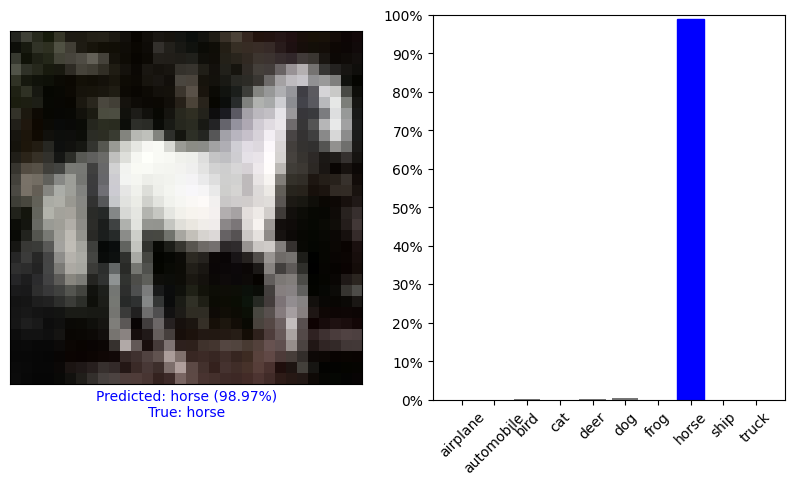

In [24]:
if image_index != -1:
    predict_and_plot_image(image_index)
else:
    print("Image not found for the specified class.")

In [25]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
print("Loss: ", test_loss)

313/313 - 1s - 2ms/step - accuracy: 0.6987 - loss: 0.8782
Test accuracy: 0.6987000107765198
Loss:  0.8781734108924866
